In [1]:
%reset

import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

from analysis import f0, sp, ap, sr, start, end, single_cycles
from util import flatten

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Reading VC_mV_sus_f_C3.wav...
WORLD analysis...
Detected 10 peaks. Choosing peak 4.


In [2]:
import IPython.display as ipd
import pyworld as pw
import matplotlib.pyplot as plt
import numpy as np

In [3]:
num_cycles = 10
sp_ = np.tile(sp[start:end, :], [num_cycles, 1])

f0_ = np.tile(np.mean(f0), sp_.shape[0])
ap_ = sp_ * 0

y = pw.synthesize(f0_, sp_, ap_, sr)

In [4]:
for datum in single_cycles:
    print(datum['sr'])

44100


In [5]:
display(ipd.Audio(y, rate=sr))

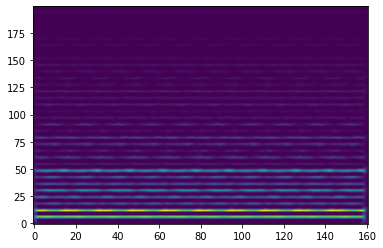

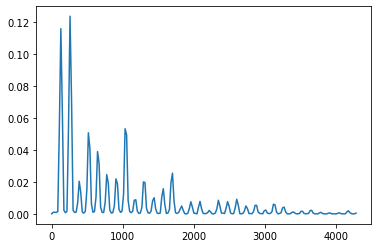

In [7]:
from scipy.signal import stft

stft_ = stft(y, fs=sr, nperseg=2048, noverlap=2048-512)[2]
spectrogram = np.abs(stft_)

plt.imshow(spectrogram[:200, :], origin='lower', aspect='auto')
plt.show()

f_ = np.arange(2048 // 2) / 2048 * sr 

plt.plot(f_[:200], spectrogram[:200, 3])
plt.show()

In [8]:
sr

44100

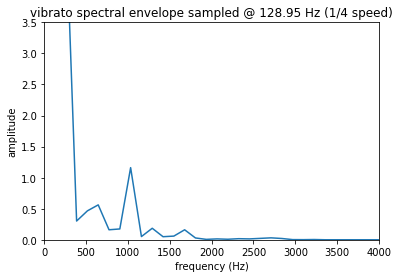

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

f = np.linspace(0, 1, sp_.shape[1], endpoint=False) * (sr // 2) 
skip = 6

fig, ax = plt.subplots()
line, = ax.plot(f[::skip], sp_[0,:][::skip])
ax.set_ylim(0, 3.5)
ax.set_xlim(0, 4000)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('vibrato spectral envelope sampled @ 128.95 Hz (1/4 speed)')

def update(i):
    new_data = sp_[i, :][::skip]
    line.set_ydata(new_data)
    return line,

ani = animation.FuncAnimation(fig, update, frames=sp_.shape[0], interval=20)
ipd.HTML(ani.to_html5_video())

# Assume f0 = 130.